## Objective:

Perform descriptive analysis on the AeroFit treamdill product and create a comprehensive customes profiles. Analyze conditional and marginal probabilities to discern customer characteristics, to facilitate a better recommendation of the products and business decisions


## Data Overview

### Features in the Dataset:

- **Product Purchased**: Customers can choose between three treadmill models – KP281, KP481, or KP781.
- **Age**: This feature represents the age of the customer in years.
- **Gender**: Customers are categorized as either Male or Female.
- **Education**: The level of education is recorded in years.
- **Marital Status**: Customers are classified as either Single or Partnered.
- **Usage**: This indicates the average number of times the customer plans to use the treadmill per week.
- **Income**: Annual income of the customer is captured in dollars.
- **Fitness**: A self-rated fitness scale from 1 (poor shape) to 5 (excellent shape) is used to assess the customer’s physical condition.
- **Miles**: This feature records the average number of miles the customer expects to walk or run each week.


**Product Portfolio**:

**KP281**: The KP281 is an entry-level treadmill that sells for $1,500.

**KP481**: The KP481 is for mid-level runners that sell for $1,750.

**KP781**: The KP781 treadmill is having advanced features that sell for $2,500.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Insights:
- Based on the analysis above, the dataset contains 9 features, with some having numeric data types and others having string data types. Additionally, there are no missing values in any of the columns.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Insights:
- **Age**: The age range in the dataset spans from 18 to 50 years, with an average age of 28.78, which can be rounded to 29 years.  
- **Education**: The customers' education duration varies from 12 to 21 years, with an average education duration of 15.57, approximated to 16 years.  
- **Usage**: Usage is measured based on the number of times the service is used per week. It ranges from 2 to 7 times per week, with an average of 3 times per week.  
- **Fitness**: On a 5-point scale, customers rated their fitness, with the average rating being 3.  
- **Annual Income**: Customers' annual income ranges from USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.  
- **Miles**: Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.


In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Insights:


**1. Product** - The `KP281` product had the highest sales performance among the three products, with a total of 80 (44%) of the total sales attributed to it.

**2. Gender** - The data shows that 104 (58%) buyers were male, and 78 (42%) were female.

**3. Marital Status** - According to the data, 107 (60%) buyers were married, and 73 (40%) were single.


In [ ]:
df.duplicated().value_counts()

False    180
dtype: int64

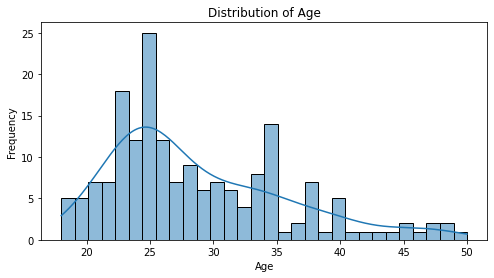

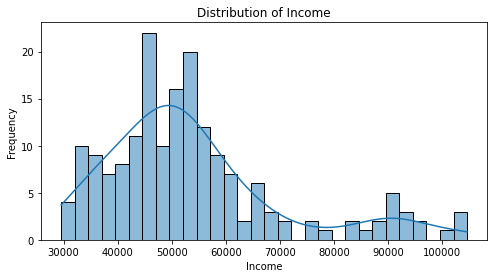

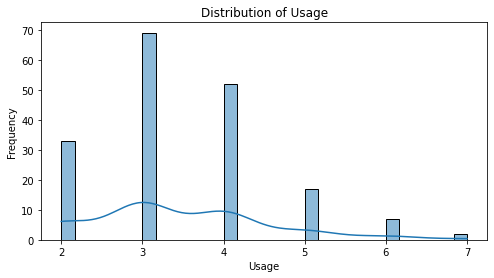

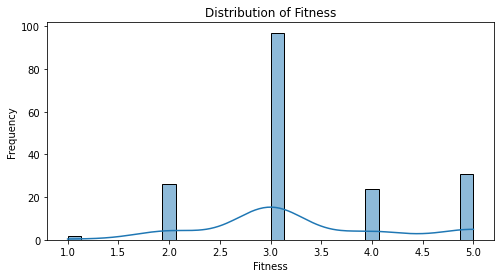

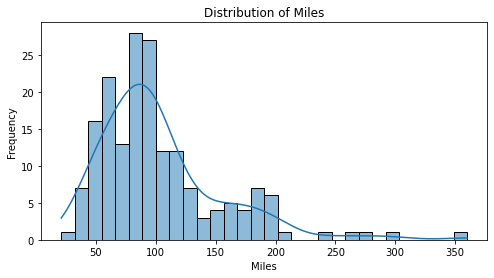

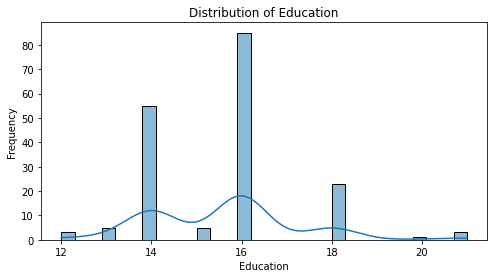

In [ ]:
# Distribution plots for numerical columns
numerical_columns = ['Age', 'Income', 'Usage', 'Fitness', 'Miles', 'Education']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


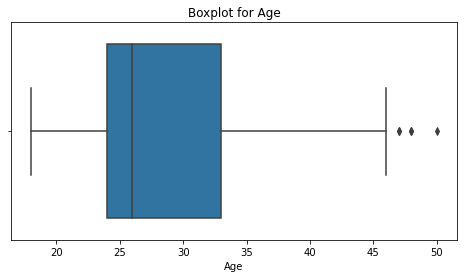

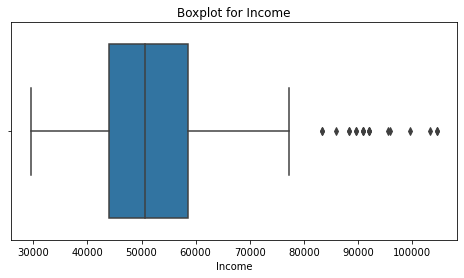

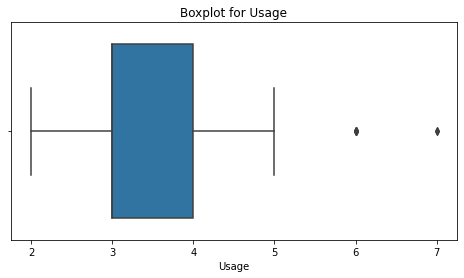

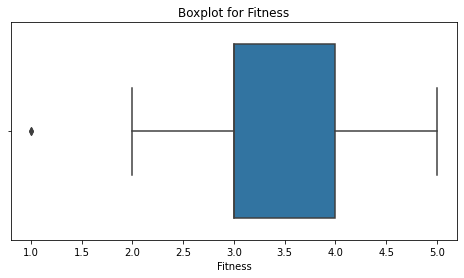

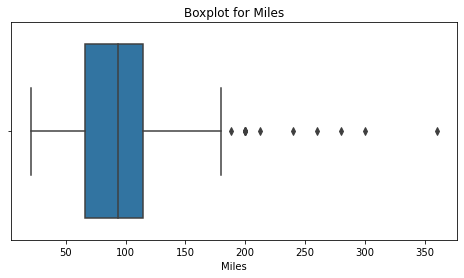

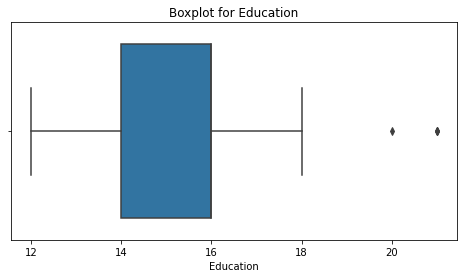

In [ ]:
#Outlier detection
numerical_columns = ['Age', 'Income', 'Usage', 'Fitness', 'Miles', 'Education']
for cols in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=cols)
    ax = plt.gca()


    for patch in ax.artists:
        median = patch.get_y() + patch.get_height() / 2
        plt.text(patch.get_x() + patch.get_width() / 2, median, f'{median:.2f}',
                 ha='center', va='center', color='black', weight='bold')

    plt.title(f'Boxplot for {cols}')
    plt.show()

Insights:
As we can observe from the box plots:

- **Age**: 3 outliers
- **Income**: Multiple outliers (The presence of more outliers in the income chart suggests a wider range of income levels within the population, possibly due to diverse economic factors and individual variations in earnings)
- **Fitness**: 1outlier
- **Fitness**: 1 outlier
- **Miles**: 8 outliers
- **Education**: 2 outliers




In [ ]:
df.Usage = df.Usage.astype('str')
df.Fitness = df.Fitness.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


Categorizing the values in Age, Education, Income, and Miles for better analysis
### Age Column
- Values in the **Age** column are categorized into 4 different groups:
  1. **Young Adult**: Ages 18 - 25
  2. **Adults**: Ages 26 - 35
  3. **Middle Aged Adults**: Ages 36 - 45
  4. **Elder**: 46 and above

### Education Column
- Values in the **Education** column are divided into 3 distinct categories:
  1. **Basic Education**: Up to 12 years
  2. **Intermediate Education**: 13 to 15 years
  3. **Advanced Education**: 16 years and above

### Income Column
- Values in the **Income** column are classified into 4 different brackets:
  1. **Low Income**: Up to 40,000
  2. **Moderate Income**: 40,000 to 60,000
  3. **High Income**: 60,000 to 80,000
  4. **Very High Income**: Above 80,000

### Miles Column
- Values in the **Miles** column are categorized into 4 activity levels:
  1. **Light Activity**: Up to 50 miles
  2. **Moderate Activity**: 51 to 100 miles
  3. **Active Lifestyle**: 101 to 200 miles
  4. **Fitness Enthusiast**: More than 200 miles


In [ ]:

age_bins = [17, 25, 35, 45, float('inf')]
age_labels = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


edu_bins = [0, 12, 15, float('inf')]
edu_labels = ['Basic Education', 'Intermediate Education', 'Higher Education']
df['edu_group'] = pd.cut(df['Education'], bins=edu_bins, labels=edu_labels)


income_bins = [0, 40000, 60000, 80000, float('inf')]
income_labels = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']
df['income_group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)


miles_bins = [0, 50, 100, 200, float('inf')]
miles_labels = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast']
df['miles_group'] = pd.cut(df['Miles'], bins=miles_bins, labels=miles_labels)


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


### Product Sales Distribution

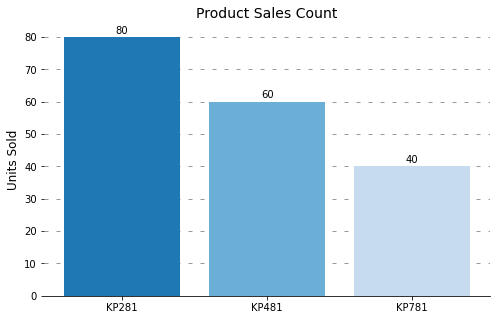

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

product_count = df['Product'].value_counts()
color_map = ["#1f77b4", "#6baed6", '#c6dbef']


ax.bar(product_count.index, product_count.values, color=color_map, zorder=2)


for i in product_count.index:
    ax.text(i, product_count[i] + 2, product_count[i], {'size': 10}, ha='center', va='center')


ax.grid(color='gray', linestyle='--', axis='y', zorder=0, dashes=(5, 10))
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)


ax.set_ylabel('Units Sold', fontsize=12)
ax.set_title('Product Sales Count', fontsize=14)

plt.show()

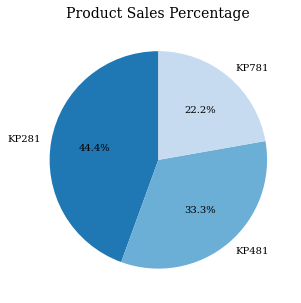

In [ ]:
product_count = df['Product'].value_counts()

product_percent = ((product_count / product_count.sum()) * 100).round(1)
fig, ax = plt.subplots(figsize=(8, 5))

ax.pie(product_percent, labels=product_count.index, autopct='%1.1f%%', startangle=90,
       colors=["#1f77b4", "#6baed6", "#c6dbef"], textprops={'fontsize': 10, 'fontfamily': 'serif'})

ax.set_title('Product Sales Percentage', fontfamily='serif', fontsize=14)

plt.show()




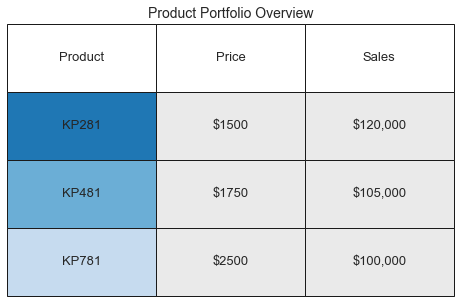

In [ ]:
product_prices = {'KP281': 1500, 'KP481': 1750, 'KP781': 2500}

df['Total_Sales'] = df['Product'].map(product_prices)

product_portfolio = [
    ['KP281', f'${product_prices["KP281"]}', f'${df[df["Product"] == "KP281"]["Total_Sales"].sum():,}'],
    ['KP481', f'${product_prices["KP481"]}', f'${df[df["Product"] == "KP481"]["Total_Sales"].sum():,}'],
    ['KP781', f'${product_prices["KP781"]}', f'${df[df["Product"] == "KP781"]["Total_Sales"].sum():,}']
]

color_2d = [
    ['#1f77b4', '#eaeaea', '#eaeaea'],
    ['#6baed6', '#eaeaea', '#eaeaea'],
    ['#c6dbef', '#eaeaea', '#eaeaea']
]

fig, ax = plt.subplots(figsize=(8, 5))

table = ax.table(cellText=product_portfolio, cellColours=color_2d, cellLoc='center',
                 colLabels=['Product', 'Price', 'Sales'], colLoc='center', bbox=[0, 0, 1, 1])

table.set_fontsize(13)
ax.axis('off')
ax.set_title('Product Portfolio Overview', fontsize=14)
plt.show()

Insights:
- The KP281 treadmill model, positioned as an entry-level product, has the highest number of units sold, followed by the KP481 (mid-level) and KP781 (advanced) models.
- All three models have nearly equal contributions in terms of generating sales revenue.

### Gender and Marital Status Distribution

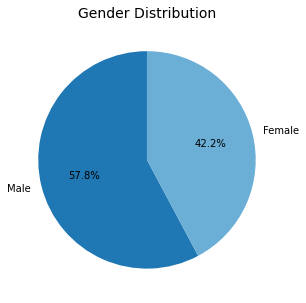

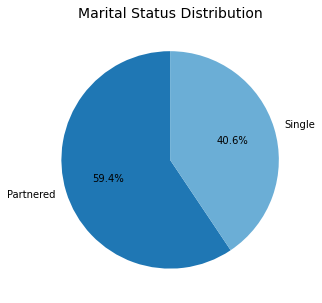

In [ ]:

gender_count = df['Gender'].value_counts()
gender_percent = ((gender_count / gender_count.sum()) * 100).round(1)

fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(gender_percent, labels=gender_count.index, autopct='%1.1f%%', startangle=90,
        colors=["#1f77b4", "#6baed6"], textprops={'fontsize': 10})
ax1.set_title('Gender Distribution',  fontsize=14)
plt.show()

# Marital Status Distribution
marital_status_count = df['MaritalStatus'].value_counts()
marital_status_percent = ((marital_status_count / marital_status_count.sum()) * 100).round(1)

fig2, ax2 = plt.subplots(figsize=(8, 5))
ax2.pie(marital_status_percent, labels=marital_status_count.index, autopct='%1.1f%%', startangle=90,
        colors=["#1f77b4", "#6baed6", "#c6dbef"], textprops={'fontsize': 10})
ax2.set_title('Marital Status Distribution', fontsize=14)
plt.show()


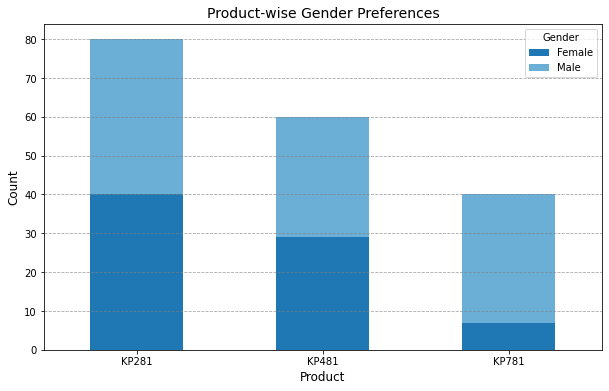

In [ ]:
product_gender_pref = df.groupby(['Product', 'Gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

product_gender_pref.plot(kind='bar', stacked=True, color=["#1f77b4", "#6baed6"], ax=ax)

ax.set_title('Product-wise Gender Preferences', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Product', fontsize=12)
ax.legend(title='Gender', labels=product_gender_pref.columns, loc='upper right')

ax.grid(axis='y', linestyle='--', color='grey', alpha=0.7)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

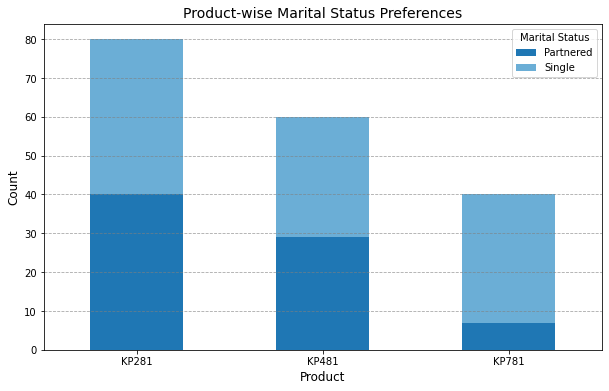

In [ ]:
product_marital_pref = df.groupby(['Product', 'MaritalStatus']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

product_gender_pref.plot(kind='bar', stacked=True, color=["#1f77b4", "#6baed6"], ax=ax)

ax.set_title('Product-wise Marital Status Preferences', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Product', fontsize=12)
ax.legend(title='Marital Status', labels=product_marital_pref.columns, loc='upper right')

ax.grid(axis='y', linestyle='--', color='grey', alpha=0.7)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**1. Gender**

- Treadmill model **KP781** is preferred more by **male customers**.
- Both treadmill models, **KP481** and **KP281**, show **equal distribution** of both the gender

**2. Marital Status**

- For all the three treadmill models, there is **uniform distribution** of Married and Single customers with **married customers** showing **slighly higher preference**

### Customer Age Distribution

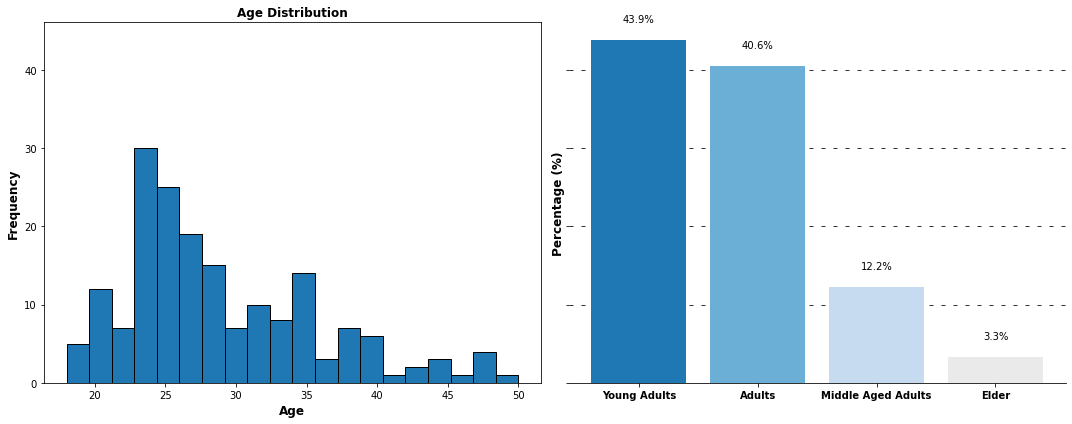

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)


ax1.hist(df['Age'], bins=20, edgecolor='black')
ax1.set_xlabel('Age', fontweight='bold', fontsize=12)
ax1.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax1.set_title('Age Distribution', {'size': 12, 'weight': 'bold'})


temp = df['age_group'].value_counts(normalize=True) * 100
temp = temp.sort_index()
color_map = ['#1f77b4', '#6baed6','#c6dbef', '#eaeaea']

bars = ax2.bar(x=temp.index, height=temp.values, color=color_map, zorder=2)

for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

ax2.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

for s in ['top', 'left', 'right']:
    ax2.spines[s].set_visible(False)

ax2.set_ylabel('Percentage (%)', fontweight='bold', fontsize=12)
ax2.set_xticklabels(temp.index, fontweight='bold')

plt.tight_layout()
plt.show()



Insights:
85% of the customers fall within the age range of young adults and adults, specifically between the ages of 18 to 35. Indicating a higher interest in the company's products among younger demographics.

### Customer Education Distribution

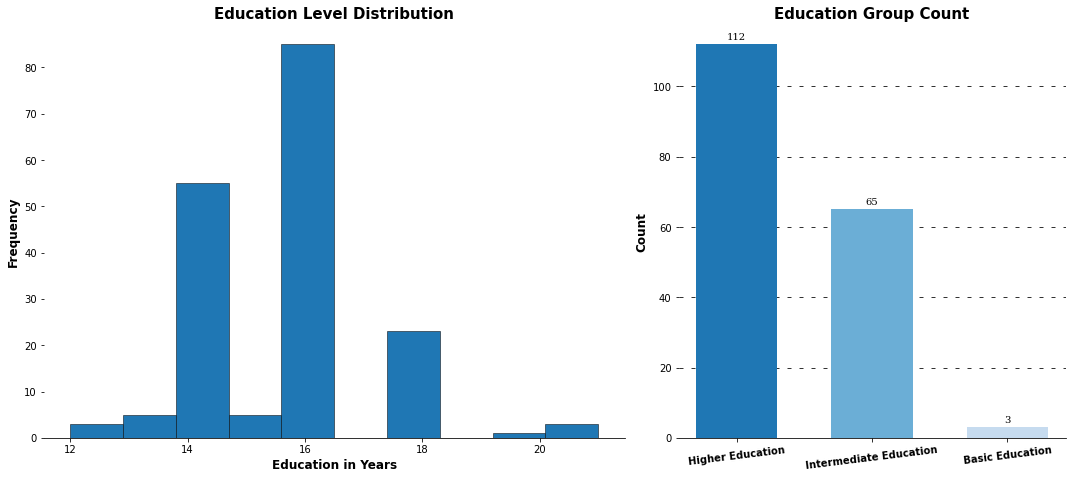

In [ ]:
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

ax0 = fig.add_subplot(gs[0,0])
ax0.hist(df['Education'], linewidth=0.5, edgecolor='black')
ax0.set_xlabel('Education in Years', fontsize=12, fontweight='bold')
ax0.set_ylabel('Frequency', fontsize=12, fontweight='bold')

for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

ax0.set_title('Education Level Distribution', {'size': 15, 'weight': 'bold'})

ax2 = fig.add_subplot(gs[0,1])
temp = df['edu_group'].value_counts()
color_map = ['#1f77b4', '#6baed6','#c6dbef', '#eaeaea']
bars = ax2.bar(x=temp.index, height=temp.values, color=color_map, zorder=2, width=0.6)

for i in temp.index:
    ax2.text(i, temp[i] + 2, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

ax2.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

for s in ['top', 'left', 'right']:
    ax2.spines[s].set_visible(False)

ax2.set_ylabel('Count', fontweight='bold', fontsize=12)
ax2.set_xticklabels(temp.index, fontweight='bold', rotation=7)

ax2.set_title('Education Group Count', {'size': 15, 'weight': 'bold'})

plt.tight_layout()
plt.show()


Insights:
- `98%` of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products. It's plausible that health awareness driven by education could play a pivotal role in this trend.


### Customer Usage and Fitness Distribution

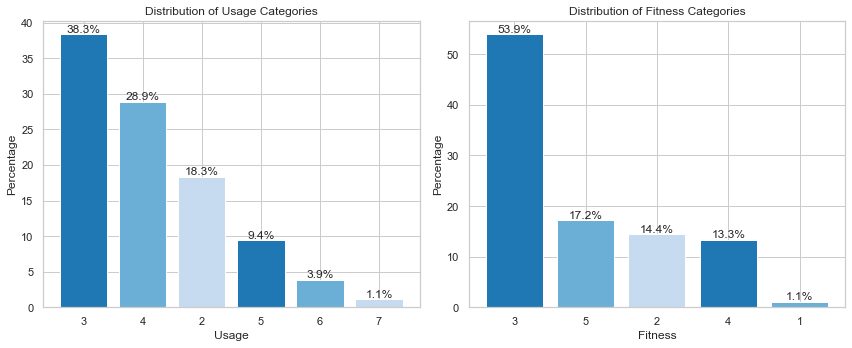

In [ ]:
usage_freq = df['Usage'].value_counts(normalize=True) * 100
fitness_freq = df['Fitness'].value_counts(normalize=True) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bars1 = ax1.bar(usage_freq.index, usage_freq.values, color=['#1f77b4', '#6baed6', '#c6dbef'])
ax1.set_title('Distribution of Usage Categories')
ax1.set_xlabel('Usage')
ax1.set_ylabel('Percentage')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

bars2 = ax2.bar(fitness_freq.index, fitness_freq.values, color=['#1f77b4', '#6baed6', '#c6dbef'])
ax2.set_title('Distribution of Fitness Categories')
ax2.set_xlabel('Fitness')
ax2.set_ylabel('Percentage')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Insights:
- Almost **85%** of the customers plan to use the treadmill for **2 to 4 times a week**, with only 15% using it 5 times and above each week.

- **54%** of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial **84%** of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels and suggesting they are on the verge of extending their exercise routine—potentially fitness enthusiasts.


### Customer Income Distribution

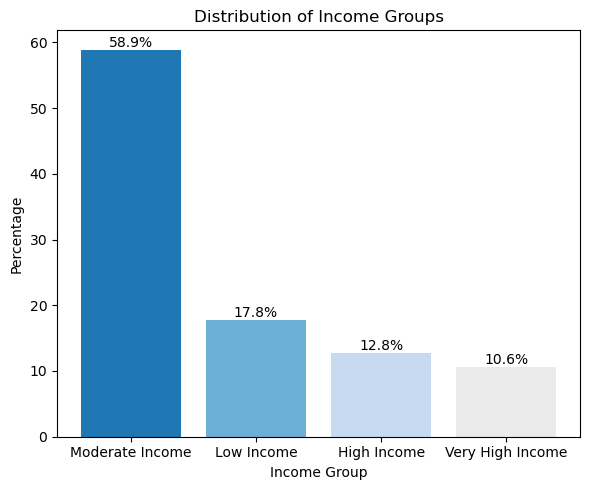

In [ ]:
income_freq = df['income_group'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(income_freq.index, income_freq.values, color=['#1f77b4', '#6baed6','#c6dbef', '#eaeaea'])
ax.set_title('Distribution of Income Groups')
ax.set_xlabel('Income Group')
ax.set_ylabel('Percentage')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Insights:
-  Almost **60%** of the customers fall into the income group of Moderate income (**40k to 60k** dollars), suggesting a higher inclination of this income group towards the products.

- Surprisingly, **18%** of the customers fall into the income group of Low income (**<40k**), indicating that nearly **77%** of the total customers fall into the income group of below **60k**, with only **23%** falling into the **60k and above** income group.


### Customers Expected Weekly Mileage

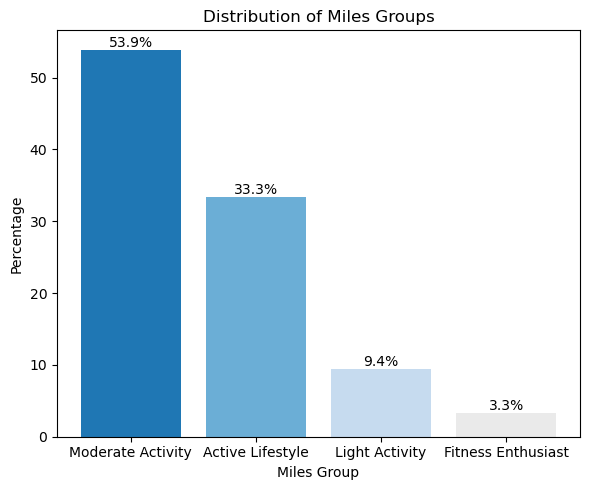

In [ ]:
miles_freq = df['miles_group'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(6, 5))

bars = ax.bar(miles_freq.index, miles_freq.values, color=['#1f77b4', '#6baed6','#c6dbef', '#eaeaea'])
ax.set_title('Distribution of Miles Groups')
ax.set_xlabel('Miles Group')
ax.set_ylabel('Percentage')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Insights:
- Almost **88%** of the customers plans to use the treadmill for **50 to 200 miles** per week.


### Analysis of Product Type

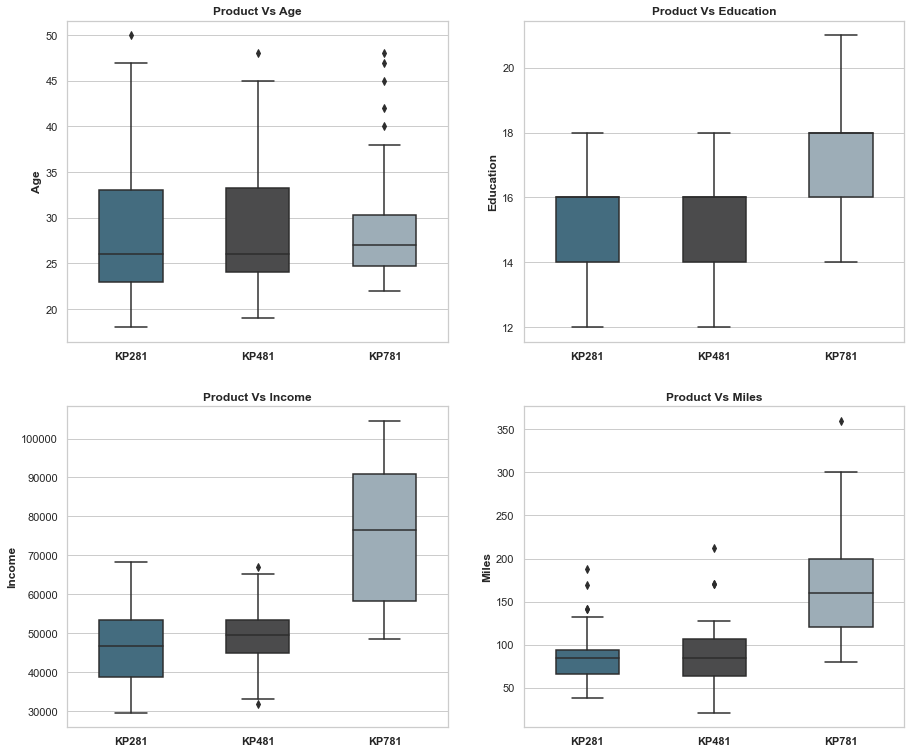

In [ ]:
fig = plt.figure(figsize = (15,13))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:

    #plot position
    ax0 = fig.add_subplot(gs[i,j])

    #plot
    sns.boxplot(data = df, x = 'Product', y  = k ,ax = ax0,width = 0.5, palette =["#3A7089", "#4b4b4c",'#99AEBB'])

    #plot title
    ax0.set_title(f'Product Vs {k}',{'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df['Product'].unique(),fontweight = 'bold')
    ax0.set_ylabel(f'{k}',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')

plt.show()

Insights:
- The analysis presented above clearly indicates a strong preference for the treadmill model **KP781** among customers who possess **higher education, higher income levels, and intend to engage in running activities exceeding **150 miles per week**.


### Product Preferences Across Age

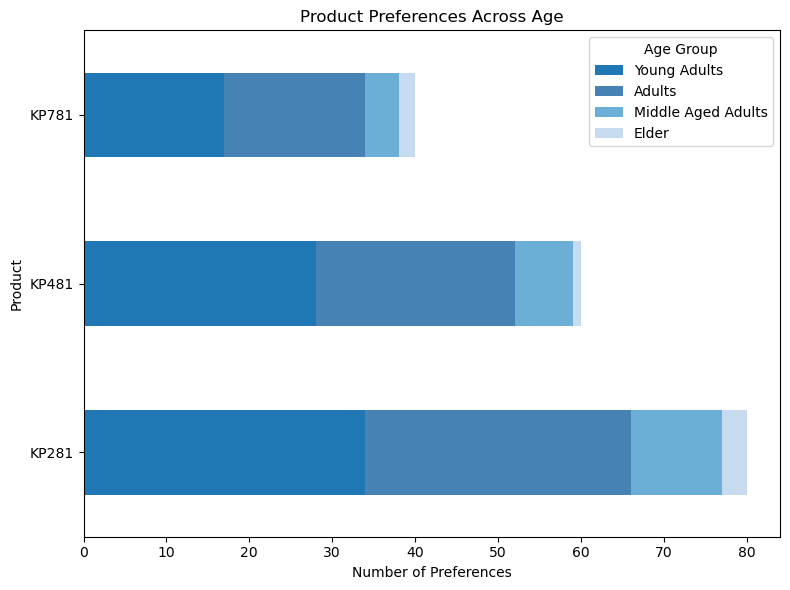

In [ ]:
age_product_counts = df.groupby(['Product', 'age_group']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(8, 6))
age_product_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#4682b4', '#6baed6', '#c6dbef'], ax=ax)

ax.set_title('Product Preferences Across Age')
ax.set_xlabel('Number of Preferences')
ax.set_ylabel('Product')
ax.legend(title='Age Group')

plt.xticks
plt.tight_layout()

Insights:
- The analysis above clearly shows that there isn’t a strong link between age groups and product preferences. This is evident from the nearly uniform distribution of age groups across all the products.

### Product Preferences Across Education Levels

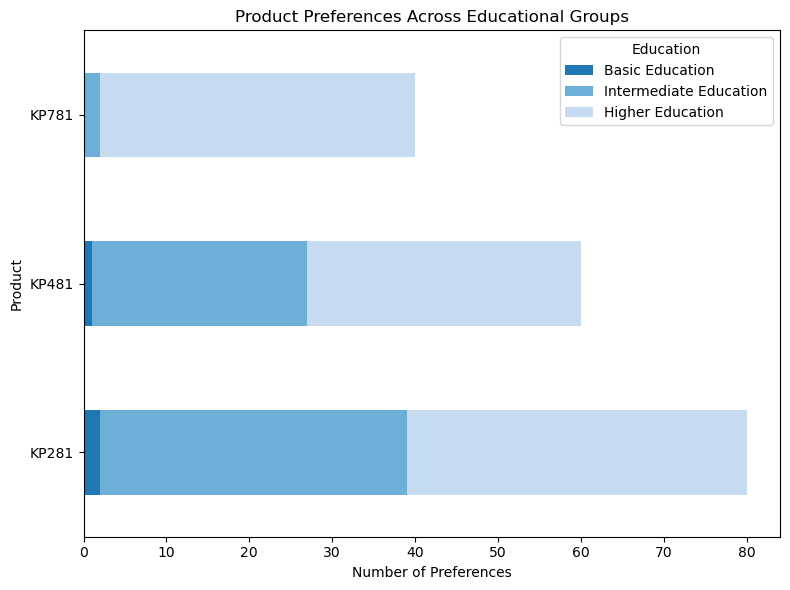

In [ ]:
edu_product_counts = df.groupby(['Product','edu_group']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(8, 6))
edu_product_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#6baed6', '#c6dbef'], ax=ax)

ax.set_title('Product Preferences Across Educational Groups')
ax.set_xlabel('Number of Preferences')
ax.set_ylabel('Product')
ax.legend(title='Education')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Insights:
- The analysis provided above cleary demonstrates the preference of **Highly Educated people** for treadmill model **KP781**
- For treadmill models **KP481** and **KP281**, the distribution of customer with **Intermediate Education** and with **Higher Education** is almost equal

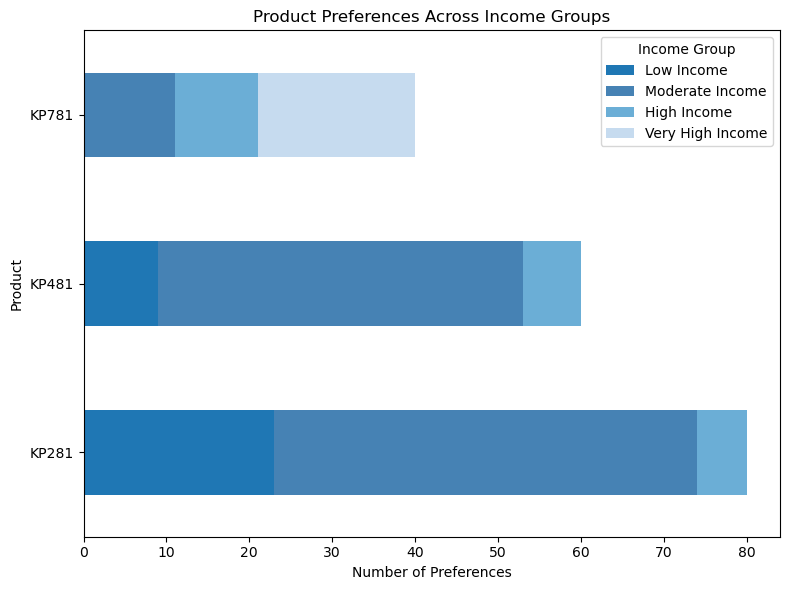

In [ ]:
income_product_counts = df.groupby(['Product', 'income_group']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(8, 6))
income_product_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#4682b4', '#6baed6', '#c6dbef'], ax=ax)

ax.set_title('Product Preferences Across Income Groups')
ax.set_xlabel('Number of Preferences')
ax.set_ylabel('Product')
ax.legend(title='Income Group')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Insights:
- Treadmill model **KP781** is preferred more by customers with **Very High Income**
- Both treadmill models, **KP481** and **KP281**, are preferred more by customers with **Moderate Income**


### Product Preference Across Customer Weekly Mileage

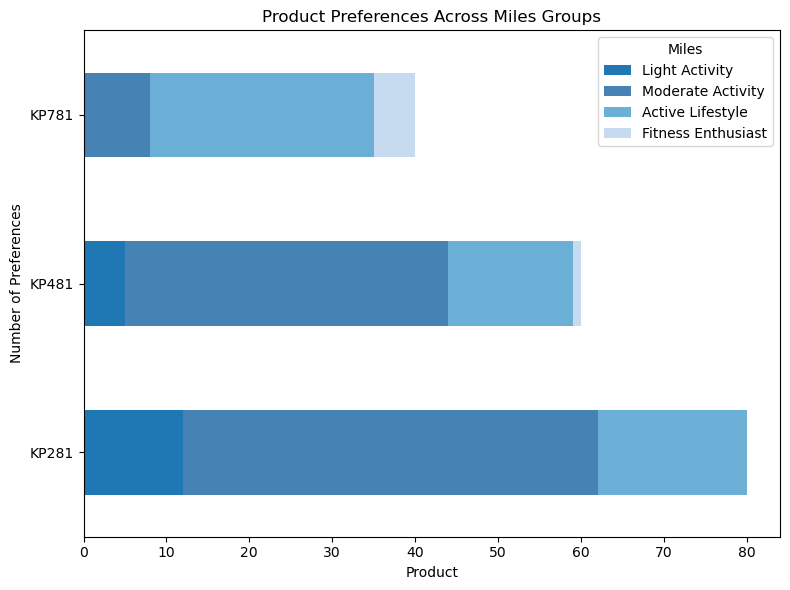

In [ ]:
miles_product_counts = df.groupby([ 'Product', 'miles_group']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(8, 6))
miles_product_counts.plot(kind='barh', stacked=True, color=['#1f77b4', '#4682b4', '#6baed6', '#c6dbef'], ax=ax)

ax.set_title('Product Preferences Across Miles Groups')
ax.set_xlabel('Product')
ax.set_ylabel('Number of Preferences')
ax.legend(title='Miles')

plt.xticks(rotation=0)  # Set x-axis labels horizontal
plt.tight_layout()
plt.show()

Insights:
- Treadmill model **KP781** is preferred more by customers planning to run **100 to 200 miles per week** who are **Active and Fitness Enthusiasts**
- Both treadmill models, **KP481** and **KP281**, are preferred more by customers planning to run **50 to 100 miles per week** who are **Light and Moderate Activity users**

###

### Gender Vs. Product Usage And Gender Vs. Fitness

posx and posy should be finite values
posx and posy should be finite values


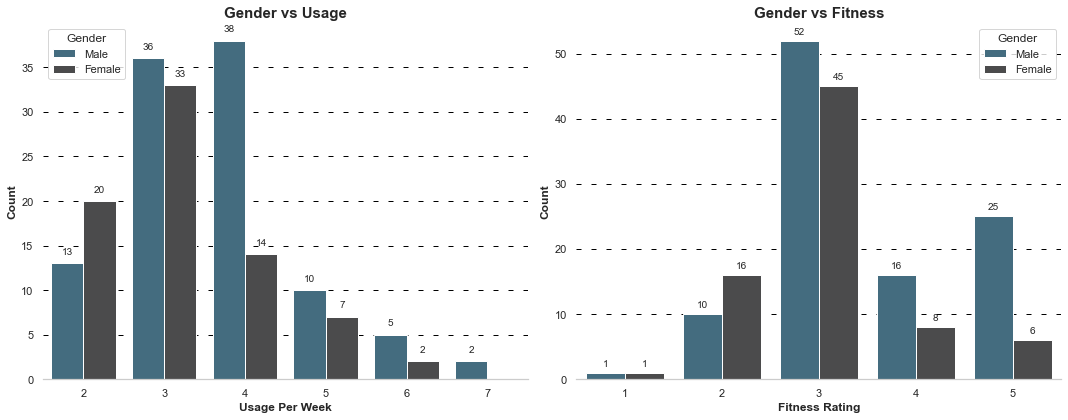

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='Usage', hue='Gender', order=sorted(df['Usage'].unique()), ax=axes[0], palette=["#3A7089", "#4b4b4c"],zorder=2
)


for bar in axes[0].patches:
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{bar.get_height():.0f}',
        ha='center',
        fontsize=10
    )

axes[0].grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))
for spine in ['top', 'left', 'right']:
    axes[0].spines[spine].set_visible(False)

axes[0].set_xlabel('Usage Per Week', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Count', fontweight='bold', fontsize=12)
axes[0].set_title('Gender vs Usage', fontsize=15, fontweight='bold')

sns.countplot(data=df, x='Fitness', hue='Gender', order=sorted(df['Fitness'].unique()), ax=axes[1], palette=["#3A7089", "#4b4b4c"],zorder=2)

for bar in axes[1].patches:
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{bar.get_height():.0f}',
        ha='center',
        fontsize=10
    )

axes[1].grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))
for spine in ['top', 'left', 'right']:
    axes[1].spines[spine].set_visible(False)

axes[1].set_xlabel('Fitness Rating', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Count', fontweight='bold', fontsize=12)
axes[1].set_title('Gender vs Fitness', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

Insights

**1. Gender Vs Usage**

- Almost **70% of Female customers** plan to use the treadmill for **2 to 3 times a week** whereas almost **70% of Male customer** plan to use the treadmill for **3 to 4 times a week**

**2. Gender Vs Fitness**

- Almost **80% of Female customers** rated themselves between **2 to 3** whereas almost **90% of Male customer** rated themselves between **3 to 5** on the fitness scale

## Correlation between Variables

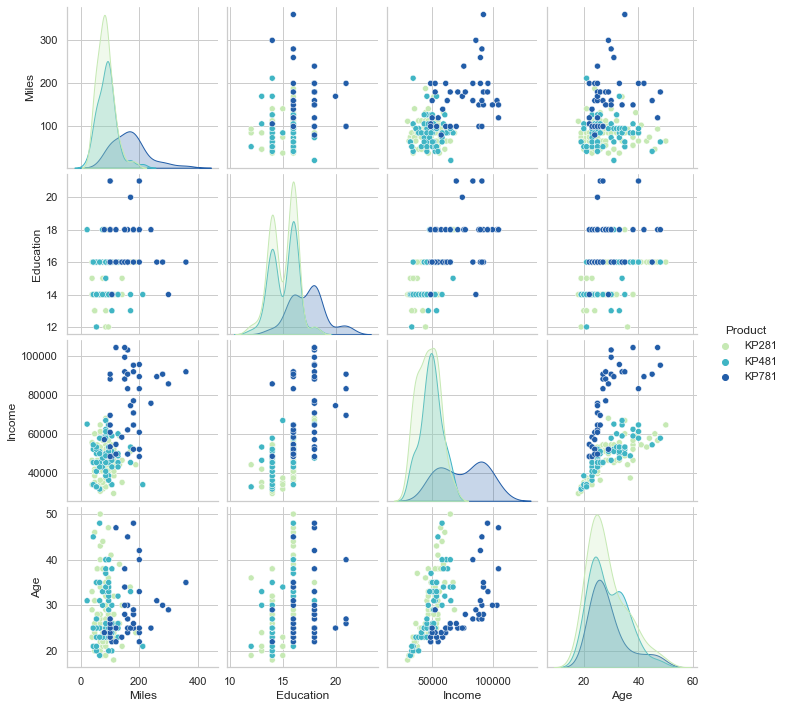

In [ ]:
import copy
df_copy = copy.deepcopy(df)
selected_columns = ['Miles', 'Education', 'Income', 'Age', 'Product']
df_selected = df_copy[selected_columns]
sns.pairplot(df_selected, hue ='Product', palette= 'YlGnBu')
plt.show()

### Heatmap

In [ ]:
df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int32 
 6   Fitness        180 non-null    int32 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int32(2), int64(4), object(3)
memory usage: 11.4+ KB


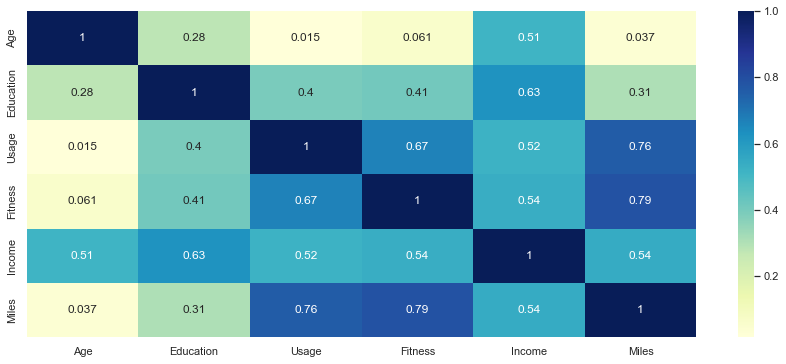

In [ ]:
corr_mat = df_copy.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")
plt.show()

Insights:
- From the pair plot, it’s clear that **age and income are positively correlated**, and the heatmap suggests a **strong correlation** between them.

- **Education** and **income** are highly correlated, as expected. Education also shows significant correlation with **fitness rating** and **treadmill usage**.

- **Usage** is strongly correlated with **fitness** and **mileage**; the more the usage, the better the fitness and mileage.


##  Computing Probability

### Probability of product purchase w.r.t. gender

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


Insights:
1. The **Probability** of a treadmill being purchased by a **female is 42%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer is **female** is:
    
        - For Treadmill model KP281 - **22%**
        
        - For Treadmill model KP481 - **16%**
        
        - For Treadmill model KP781 - **4%**

2. The **Probability** of a treadmill being purchased by a **male is 58%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer is **male** is:
    
        - For Treadmill model KP281 - **22%**
        
        - For Treadmill model KP481 - **17%**
        
        - For Treadmill model KP781 - **18%**


### Probability of product purchase w.r.t. Age

In [ ]:
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


Insights:

1. The **Probability** of a treadmill being purchased by a **Young Adult (18-25) is 44%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer is **Young Adult** is:
    
        - For Treadmill model KP281 - **19%**
        
        - For Treadmill model KP481 - **16%**
        
        - For Treadmill model KP781 - **9%**

2. The **Probability** of a treadmill being purchased by a **Adult (26-35) is 41%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer is **Adult** is:
    
        - For Treadmill model KP281 - **18%**
        
        - For Treadmill model KP481 - **13%**
        
        - For Treadmill model KP781 - **9%**

3. The **Probability** of a treadmill being purchased by a **Middle Aged (36-45) is 12%**.

4. The **Probability** of a treadmill being purchased by an **Elder (Above 45) is only 3%**.


### Probability of product purchase w.r.t. Education level

In [ ]:
pd.crosstab(index =df['Product'],columns = df['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Basic Education,Intermediate Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


Insights:
1. The **Probability** of a treadmill being purchased by a customer with **Higher Education (Above 15 Years) is 62%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Higher Education** is:
    
        - For Treadmill model KP281 - **23%**
        
        - For Treadmill model KP481 - **18%**
        
        - For Treadmill model KP781 - **21%**

2. The **Probability** of a treadmill being purchased by a customer with **Intermediate Education (13-15 yrs) is 36%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Intermediate Education** is:
    
        - For Treadmill model KP281 - **21%**
        
        - For Treadmill model KP481 - **14%**
        
        - For Treadmill model KP781 - **1%**

3. The **Probability** of a treadmill being purchased by a customer with **Basic Education (0 to 12 yrs) is only 2%**.


### Probability of product purchase w.r.t. Income

In [ ]:
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


Insights:

1. The **Probability** of a treadmill being purchased by a customer with **Low Income(<40k) is 18%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Low Income** is  -
        - For Treadmill model KP281 - **13%**
    
        - For Treadmill model KP481 - **5%**
    
        - For Treadmill model KP781 - **0%**
        
        
2. The **Probability** of a treadmill being purchased by a customer with **Moderate Income(40k - 60k) is 59%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Moderate Income** is  -
        - For Treadmill model KP281 - **28%**
    
        - For Treadmill model KP481 - **24%**
    
        - For Treadmill model KP781 - **6%**
        

3. The **Probability** of a treadmill being purchased by a customer with **High Income(60k - 80k) is 13%**

    - **The conditional probability** of purchasing the treadmill model given that the customer has **High Income** is  -
    
        - For Treadmill model KP281 - **3%**
    
        - For Treadmill model KP481 - **4%**
    
        - For Treadmill model KP781 - **6%**
        
        
4. The **Probability** of a treadmill being purchased by a customer with **Very High Income(>80k) is 11%**

    - **The conditional probability** of purchasing the treadmill model given that the customer has **High Income** is  -
    
        - For Treadmill model KP281 - **0%**
    
        - For Treadmill model KP481 - **0%**
    
        - For Treadmill model KP781 - **11%**

### Probability of product purchase w.r.t. Marital Status

In [ ]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


Insights:
1. The **Probability** of a treadmill being purchased by a **Married Customer is 59%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer is **Married** is:
    
        - For Treadmill model KP281 - **27%**
        
        - For Treadmill model KP481 - **20%**
        
        - For Treadmill model KP781 - **13%**

2. The **Probability** of a treadmill being purchased by an **Unmarried Customer is 41%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer is **Unmarried** is:
    
        - For Treadmill model KP281 - **18%**
        
        - For Treadmill model KP481 - **13%**
        
        - For Treadmill model KP781 - **9%**



### Probability of product purchase w.r.t. Weekly Usage

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


Insights

1. The **Probability** of a treadmill being purchased by a customer with **Usage 3 times per week is 38%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Usage 3 per week** is:
    
        - For Treadmill model KP281 - **21%**
        
        - For Treadmill model KP481 - **17%**
        
        - For Treadmill model KP781 - **1%**

2. The **Probability** of a treadmill being purchased by a customer with **Usage 4 times per week is 29%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Usage 4 per week** is:
    
        - For Treadmill model KP281 - **12%**
        
        - For Treadmill model KP481 - **7%**
        
        - For Treadmill model KP781 - **10%**

3. The **Probability** of a treadmill being purchased by a customer with **Usage 2 times per week is 18%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Usage 2 per week** is:
    
        - For Treadmill model KP281 - **11%**
        
        - For Treadmill model KP481 - **8%**
        
        - For Treadmill model KP781 - **0%**


### Probability of product purchase w.r.t. Customer Fitness

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


Insights:
1. The **Probability** of a treadmill being purchased by a customer with **Average (3) Fitness is 54%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Average Fitness** is:
    
        - For Treadmill model KP281 - **30%**
        
        - For Treadmill model KP481 - **22%**
        
        - For Treadmill model KP781 - **2%**

2. The **Probability** of a treadmill being purchased by a customer with **Fitness of 2, 4, 5 is almost 15%**.

3. The **Probability** of a treadmill being purchased by a customer with **very low (1) Fitness is only 1%**.


### Probability of product purchase w.r.t. weekly mileage

In [ ]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


Insights:

1. The **Probability** of a treadmill being purchased by a customer with a lifestyle of **Light Activity (0 to 50 miles/week) is 9%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Light Activity Lifestyle** is:
    
        - For Treadmill model KP281 - **7%**
        
        - For Treadmill model KP481 - **3%**
        
        - For Treadmill model KP781 - **0%**

2. The **Probability** of a treadmill being purchased by a customer with a lifestyle of **Moderate Activity (51 to 100 miles/week) is 54%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer with **Moderate Activity** is:
    
        - For Treadmill model KP281 - **28%**
        
        - For Treadmill model KP481 - **22%**
        
        - For Treadmill model KP781 - **4%**

3. The **Probability** of a treadmill being purchased by a customer with **Active Lifestyle (100 to 200 miles/week) is 33%**.

    - **The conditional probability** of purchasing the treadmill model given that the customer has **Active Lifestyle** is:
    
        - For Treadmill model KP281 - **10%**
        
        - For Treadmill model KP481 - **8%**
        
        - For Treadmill model KP781 - **15%**

4. The **Probability** of a treadmill being purchased by a customer who is a **Fitness Enthusiast (>200 miles/week) is 3% only**.


## Customer Profiling
Based on the analysis:

- **Probability of purchase of KP281**: 44%
- **Probability of purchase of KP481**: 33%
- **Probability of purchase of KP781**: 22%

### Customer Profile for KP281 Treadmill:
- **Age**: Primarily between 18 to 35 years, with some extending up to 50 years.
- **Education Level**: At least 13 years of schooling.
- **Annual Income**: Below USD 60,000.
- **Weekly Usage**: 2 to 4 times.
- **Fitness Scale**: 2 to 4.
- **Weekly Running Mileage**: 50 to 100 miles.

### Customer Profile for KP481 Treadmill:
- **Age**: Primarily between 18 to 35 years, with some extending up to 50 years.
- **Education Level**: At least 13 years of schooling.
- **Annual Income**: Between USD 40,000 to USD 80,000.
- **Weekly Usage**: 2 to 4 times.
- **Fitness Scale**: 2 to 4.
- **Weekly Running Mileage**: 50 to 200 miles.

### Customer Profile for KP781 Treadmill:
- **Gender**: Male
- **Age**: Between 18 to 35 years.
- **Education Level**: At least 15 years of schooling.
- **Annual Income**: USD 80,000 and above.
- **Weekly Usage**: 4 to 7 times.
- **Fitness Scale**: 3 to 5.
- **Weekly Running Mileage**: 100 miles and above.


## Recommendations
### Marketing Campaigns for KP781

- **Enhance Female Engagement**: Implement targeted marketing strategies and exclusive promotions aimed at female customers to bridge the gender sales gap. Consider offering trials, special discounts, or events tailored to their preferences.
- **Highlight Benefits**: Clearly communicate the benefits of KP781, such as its advanced features, robust performance, and durability. Highlight how these qualities can enhance fitness routines and support long-term health goals.
- **Leverage Social Media**: Utilize social media platforms to reach a broader audience. Engage fitness influencers, create videos showcasing treadmill use and success stories, and host live demonstrations to build interest and credibility.
- **Collaborate with Fitness Professionals**: Partner with fitness trainers, physical therapists, and wellness experts to offer workshops, classes, or webinars that demonstrate the treadmill’s capabilities and provide personalized advice to potential buyers.
- **Offer Trial Periods**: Provide potential customers with the opportunity to try out the treadmill for a trial period, either in-store or through home trials. This allows them to experience the product’s benefits firsthand before committing to a purchase.

### Affordable Pricing and Payment Plans

- **Offer Flexible Financing Options**: Develop financing solutions such as 0% interest payment plans, rent-to-own options, or leasing agreements. These options can make the treadmill more affordable and approachable, particularly for younger customers or those with tight budgets.
- **Bundle Offers**: Create bundle deals that combine the treadmill with accessories like heart rate monitors, pedometers, running shoes, or workout apparel. This can add perceived value and encourage additional purchases.
- **Highlight Long-Term Value**: Emphasize the long-term value of the treadmill, such as durability, extended warranties, and low maintenance costs. This messaging can appeal to cost-conscious consumers who are looking for an investment in their fitness journey.
- **Online Discounts and Coupons**: Offer limited-time online discounts and promotional codes that can be redeemed on the company’s website or partnered e-commerce platforms. This can drive online traffic and sales.
- **Add Integration with Zwift and Strava**: Integrate with Zwift, the popular fitness app that combines virtual running and cycling with real-world training, and Strava, the leading fitness tracking platform. This allows users to engage in immersive workouts, track their progress, and participate in virtual races. Zwift’s gamification elements and Strava’s tracking capabilities can enhance motivation and make treadmill use more interactive and enjoyable.

### User-Friendly App Integration

- **Customizable Workout Plans**: Develop customizable workout plans that allow users to set their fitness goals, track their progress, and adjust routines based on their evolving needs. These plans should include a variety of exercises suited to different fitness levels.
- **Integrate Fitness Tracking**: Include integration with popular fitness tracking apps such as Fitbit, Apple Health, or Google Fit to allow users to track their overall health metrics alongside their treadmill workouts.
- **Provide Health Insights**: Offer health insights and tips based on user data, such as personalized recommendations on stretching, nutrition, and hydration. This can help users maintain a holistic approach to fitness.
- **Add Integration with Zwift and Strava**: Incorporate Zwift’s immersive and interactive virtual training experiences alongside Strava’s robust tracking and social features. Users can connect their treadmill to both platforms to run through scenic virtual courses, participate in races, and track their progress. This integration can help keep users engaged and enhance their overall workout experience.
- **Provide Real-Time Feedback**: Ensure the app provides real-time feedback on running performance, such as cadence, stride length, and heart rate, to help users optimize their workouts and prevent injuries.
